# Графы. Синтез систем. Курсовая работа. Теория.

## Находение оптимального пути

### Содержимое входного файла:

Route: 		#старт, финиш

a, d

Nodes: 		#вершины

a, b, c, d, e, f, g

Edges:		#ребра ненаправленные, число - вес

a, b, 10

b, c, 2

b, d, 9

c, d, 4

d, f, 5

e, f, 6

a, g, 5

b, e, 2

g, e, 4

b, g, 3

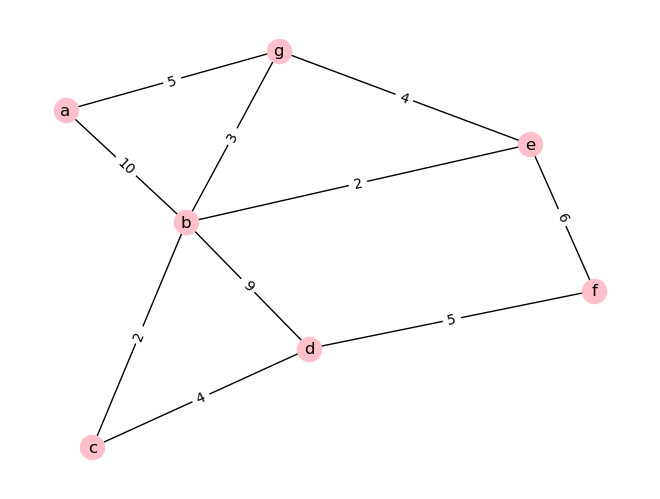

### Функция парсинга файла:

In [16]:
def parse(file_name):
    data = []
    merge_list = []

    # Считывание данных из файла
    with open(file_name, 'r', encoding='utf-8') as file:
        info = file.read()

    # Отделение подписей и данных
    for el in info.split('\n'):
        if '#' not in el:
            data.append(el)

    # Формирование итоговых данных
    start_edge: str = data[0][0]
    final_edge: str = data[0][3]
    all_edges: str = data[1]

    # Формиparseрование словаря смежности взвешенного графа
    data = data[2:]
    for el in data:
        merge_list.append(tuple(el.split(', ')))

    # Формирования словаря весов графа
    weight: dict = {el[0] + el[1]: el[2] for el in merge_list}

    # Формирования графа в виде словаря
    dict_ = {}
    for el in merge_list:
        # print(dict_)
        # for ell in el:
        if el[0] in dict_:
            dict_[el[0]].append(tuple([int(el[2]), el[1]]))
        elif el[0] not in dict_:
            dict_[el[0]] = [tuple([int(el[2]), el[1]])]

        if el[1] in dict_:
            dict_[el[1]].append(tuple([int(el[2]), el[0]]))
        elif el[1] not in dict_:
            dict_[el[1]] = [tuple([int(el[2]), el[0]])]

    return start_edge, final_edge, dict_


if __name__ == '__main__':
    
    file_path = 'C:\Py Projects\System\Kursovai\\test.txt'
    print(f'Начальная точка графа (пути): {parse(file_path)[0]}')
    print(f'Конечная точка графа (пути): {parse(file_path)[1]}')
    print(f'Граф, представленный ввиде списков смежности (словарь):\n {parse(file_path)[2]}')


Начальная точка графа (пути): a
Конечная точка графа (пути): d
Граф, представленный ввиде списков смежности (словарь):
 {'a': [(10, 'b'), (5, 'g')], 'b': [(10, 'a'), (2, 'c'), (9, 'd'), (2, 'e'), (3, 'g')], 'c': [(2, 'b'), (4, 'd')], 'd': [(9, 'b'), (4, 'c'), (5, 'f')], 'f': [(5, 'd'), (6, 'e')], 'e': [(6, 'f'), (2, 'b'), (4, 'g')], 'g': [(5, 'a'), (4, 'e'), (3, 'b')]}


In [14]:
# from parse_txt import parse
from heapq import *
file_path = 'C:\Py Projects\System\Kursovai\\test.txt'

# Реализация алгоритма Дейкстры (на куче)
def dijkstra(start_node, finish_node, graph_node):
    queue = []
    heappush(queue, (0, start_node))
    cost_visited = {start_node: 0}
    visited = {start_node: None}

    while queue:
        cur_cost, node = heappop(queue)
        if node == finish_node:
            break

        next_nodes = graph_node[node]
        for next_node in next_nodes:
            neigh_cost, neigh_node = next_node
            new_cost = cost_visited[node] + neigh_cost

            if neigh_node not in cost_visited or new_cost < cost_visited[neigh_node]:
                heappush(queue, (new_cost, neigh_node))
                cost_visited[neigh_node] = new_cost
                visited[neigh_node] = node

    return visited, cost_visited


if __name__ == '__main__':
    
    start = parse(file_path)[0]
    finish = parse(file_path)[1]
    graph = parse(file_path)[2]

    path = f'{finish}'
    visited_nodes, cost_visited_nodes = dijkstra(start, finish, graph)
    cur_node = finish

    print(f'\nКратчайший маршрут от {start} до {finish}:')

    while cur_node != start:
        cur_node = visited_nodes[cur_node]
        path += f' >--- {cur_node} '
    path = path[::-1]
    print(path)
    print(f'Длина кратчайшего маршрута от {start} до {finish}: {cost_visited_nodes[finish]}')



Кратчайший маршрут от a до d:
 a --->  g --->  b --->  c ---> d
Длина кратчайшего маршрута от a до d: 14


## Решение задачи обходом в глубину




***__Обход графа в глубину (DFS)__*** – это алгоритм для обнаружения всех узлов в графе. 

Алгоритм посещает все вершины графа и ребра раз и только раз, и сохраняет информацию о том, какие вершины уже посещены. Алгоритм обхода графа в глубину без использования рекурсии:


In [ ]:

def dfs_iterative(graph, start_vertex):
    stack = [start_vertex]
    visited = set()
    while stack:
        vertex = stack.pop()
        if vertex not in visited:
            visited.add(vertex)
            stack.extend(graph[vertex] - visited)
    return visited

- graph - это представление графа в виде словаря, где ключи - это узлы, а значения - это множества соседей для каждого узла.
- start_vertex - это стартовый узел для обхода графа.

Этот алгоритм использует стек (list в Python), чтобы помнить, какие узлы нужно обойти на следующей итерации. Переменная visited используется для хранения информации о всех узлах, которые уже были посещены.

На каждой итерации алгоритм берет вершину vertex из стека (последний добавленный узел) и проверяет, был ли этот узел посещен ранее. Если этот узел не был посещен, то он добавляется в множество visited, а все его непосещенные соседи добавляются в стек stack с помощью команды `stack.extend(graph[vertex] - visited)`. Это означает, что алгоритм будет продолжать идти вглубь графа, пока есть непосещенные соседи текущего узла.

- Мы добавляем в стек `stack` все элементы из списка `graph[vertex]`, которые не входят в список `visited`. Это происходит с помощью метода `extend`, который добавляет все элементы из переданного ему списка в конец списка, на котором он был вызван.

- `graph[vertex] - visited` используется для получения разницы между списком `graph[vertex]` и списком `visited`. Это означает, что будет возвращен список элементов, которые есть в `graph[vertex]`, но которых нет в `visited`.

- Таким образом, строки кода добавят в стек `stack` все элементы, которые не были посещены и которые связаны с текущей вершиной `vertex` в графе `graph`.

Когда стек stack пуст, все узлы графа были посещены и множество visited содержит все узлы графа. Алгоритм возвращает это множество.

Этот алгоритм не использует рекурсию или очередь, а вместо этого использует стэк, чтобы запоминать необходимые узлы.


## Решение задачи обходом в ширину



Обхода графа в ширину без использования очереди и рекурсии:

In [6]:
def bfs(graph, start):
    visited = []  # список посещенных вершин
    stack = []  # стек для обхода графа в ширину
    stack.append(start)  # добавляем в стек стартовую вершину

    while stack:
        vertex = stack.pop(0)
        if vertex not in visited:
            visited.append(vertex)
            stack.extend([x for x in graph[vertex] if x not in visited])

    return visited

- Алгоритм обходит граф в ширину, начиная с указанной стартовой вершины, и использует список посещенных вершин и стек для хранения вершин, которые нужно посетить. 
- В цикле мы извлекаем вершину из стека и проверяем, была ли она посещена ранее. 
- Если вершина была посещена, мы пропускаем ее. 
- Если же вершина не была посещена, мы добавляем ее в список посещенных и добавляем в стек соседние вершины, которые еще не были посещены. 
- Таким образом, мы обходим все вершины графа из начальной точки в ширину.

## Код со встречи в Discord по курсовой

In [ ]:

## Код со встречи в Discord по курсовой

"""

            - Обход в глубину и ширину

            - Подсчет связанности графов

            - Выделение компонетиов связанности

            - Посмотреть словари

"""

# typle_test = [(a, b), (b, c), (c, d), (d,a)]
edges = []
vertex = []

with open('test.txt', 'r')  as file:
    text = file.readlines()

for el in text:
    vertex_a = el[0]
    vertex_b = el[1]
    vertex.append(vertex_a)
    vertex.append(vertex_b)
    edges.append((vertex_a, vertex_b))
dots = set(vertex)
print(f'Длина: {len(set(vertex))} \nТочки: {dots}')
print(f'Связи: {edges}')
# pos_a = []
# pos_b = []
# pos_c = []
# pos_d = []
# pos_f = []
def recur(dot_loc):
    if dot_loc not in set_1:
        set_1.add(dot_loc)
        p = 0


        for i in range(len(edges)):
            if dot_loc in edges[i]:
                p += 1
                vertex_1 = edges[i][0]
                vertex_2 = edges[i][1]
                if vertex_1 == dot_loc:
                    recur(vertex_2)
                elif vertex_2 == dot_loc:
                    recur(vertex_1)

        # print(p)

if __name__ == "__main__":
    set_1 = set()
    for dot in dots:
        recur(dot)
    print(f'Посещённые точки {set_1}')

## Обход графов в глубину (Конспект) 

## Матрица смежности 

Одним из способов хранения графов является матрица смежности.
- Матрица будет симметричной относительно главной диагонали в том случае , 
если граф неориентированный.
- Количество ребер в графе ВСЕГДА меньше квадрата вершина.
- Граф называется полным, если каждая вершина соединена со всеми остальными (практически не существуют).
- Разреженным граф считается, если ребер значительно меньше квадрата вершин.
- В основном будем использоватьсписки смежности.
V  корней из V  - для таких задач подходит матрица смежности (проблема в производительности)
Структура списков смежности:
- первый список - список динамических списков ()
- динамический список для каждой вершины
Алгоритм:
- Для полученного ребра (если не ориентированное) добавляем значение  попарно для каждой вершины в свой дин. список.

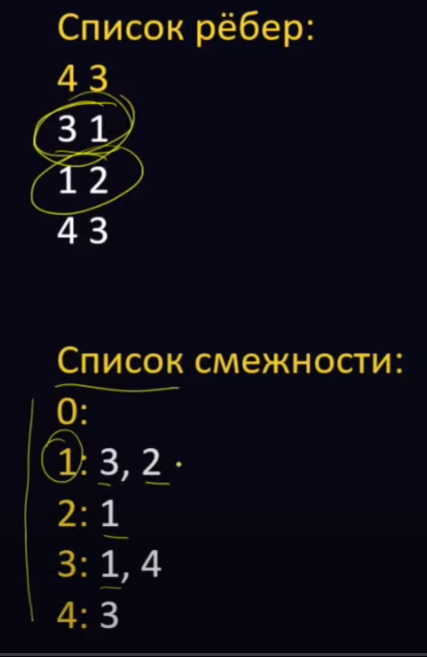

## Обход графов в глубину

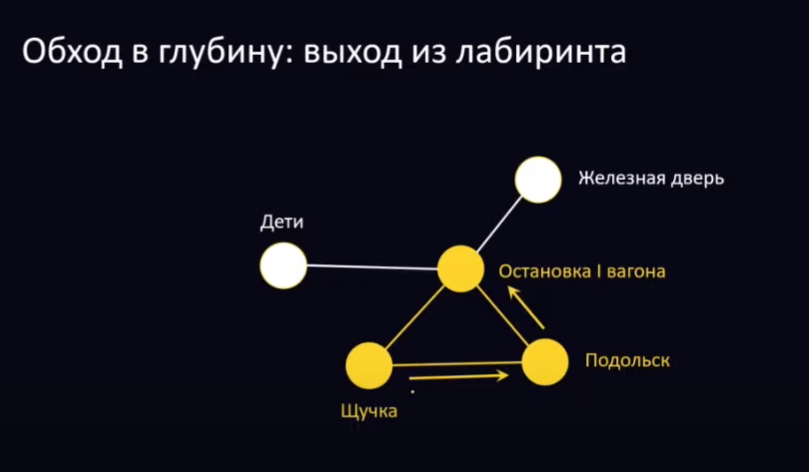

Алгорим:
- Выбираем направление и идем
- После прихода в новую вершину, указываем откуда пришли
- Если есть ребро к вершине , в которой еще не были - идем
- Если тупик или вершина ведет в вершину, в которой уже были - возвращаемся по отметкам, которые указывали при проходе до тупика

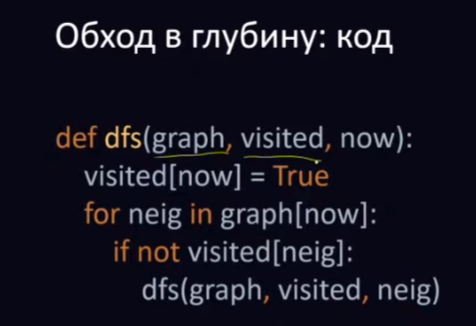

## Компоненты связанности

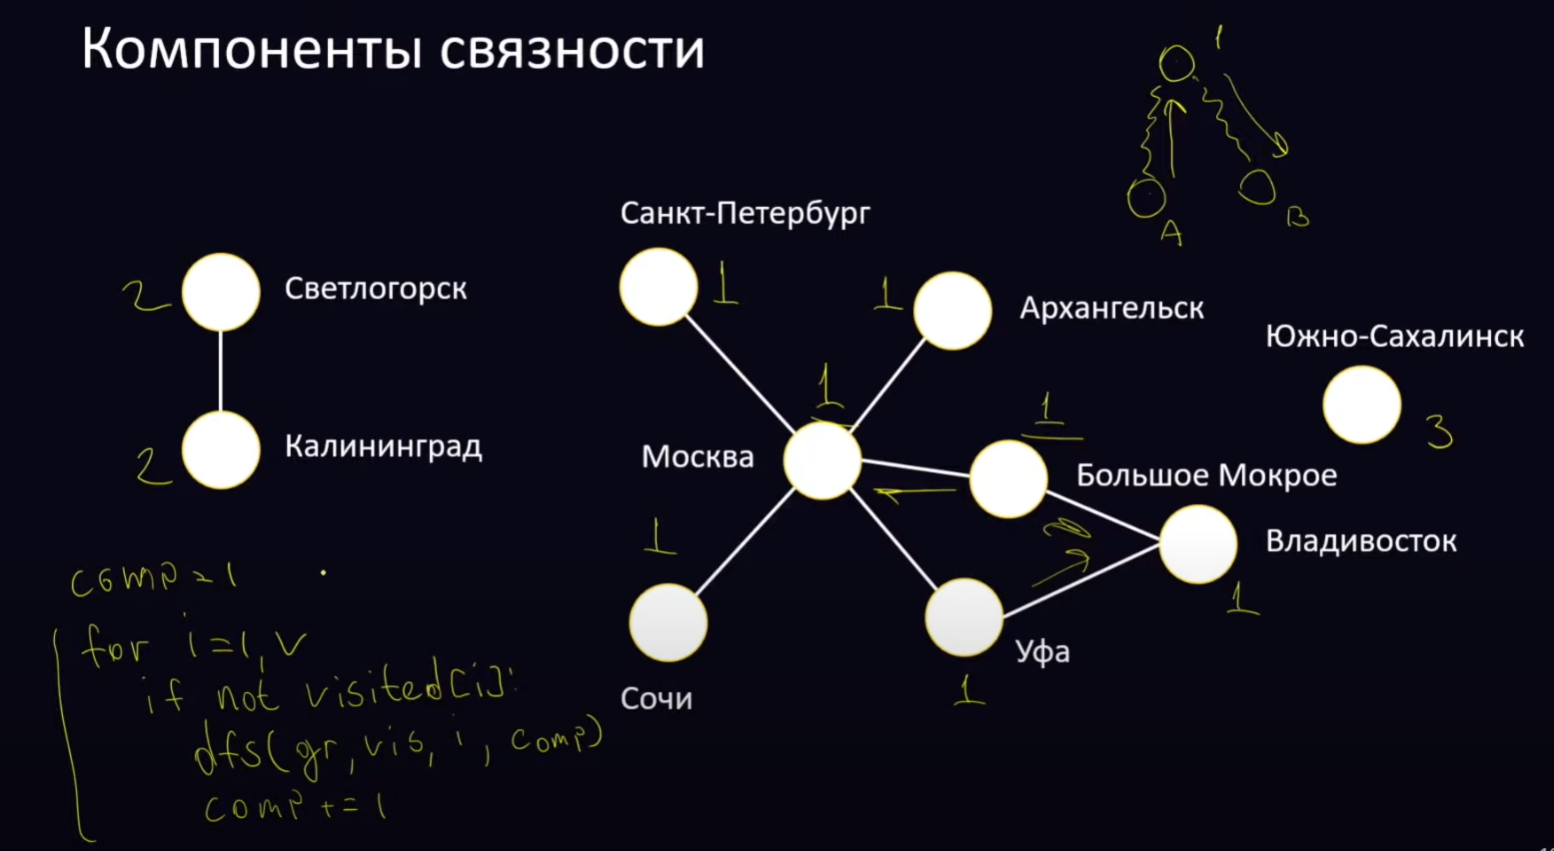

Алгоритм нахождения компонент связности:
- Реализуется функция обхода в глубину.
- Вводится дополнительный маркер в исходную функцию.
- Данный маркер показывает связанность вершин графа.
- Компонент меняется, если  у ново - рассматриваемой вершины нет связи с уже посещенными .
- компонента маркирует связанные части графа и показывает сколько независимо - связанных  вершин присутствует в графе.


## Циклы в графах

### Циклы бывают только в ориентированных графах.

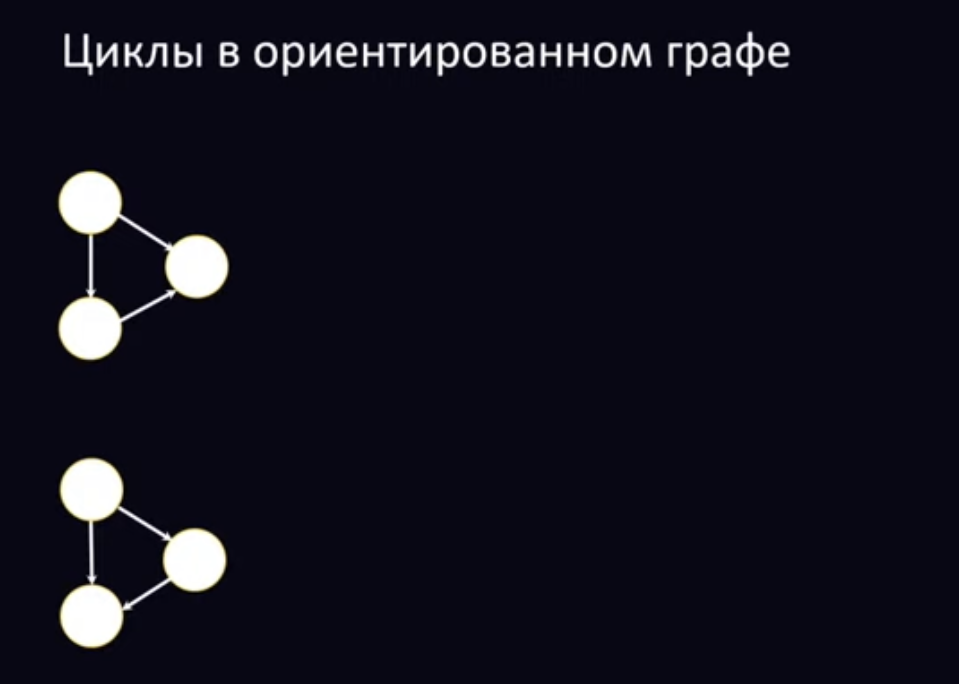

Если мы пришли и пометили вершину серым, а соседом для этой серой является серая вершина - в графе есть цикл.


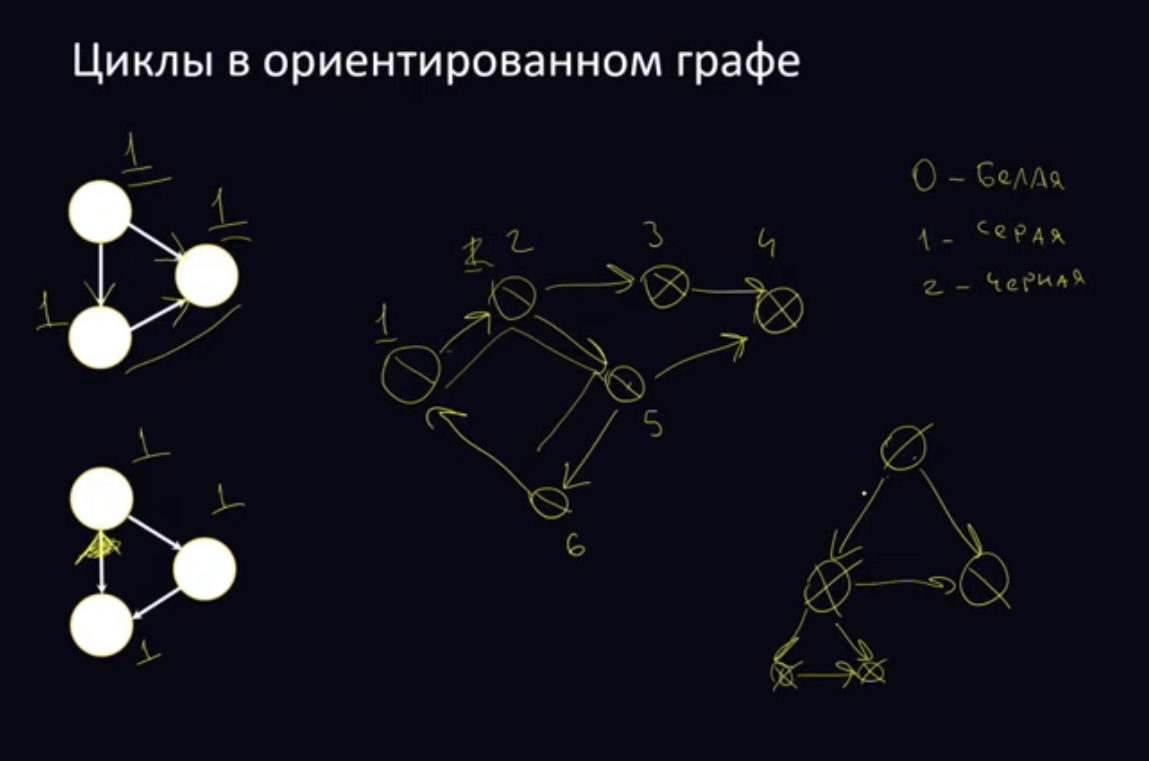

Важные уточнения:
- Одновременно не могут быть серыми вершины разных путей.
- Черные вершины показывают тупик в пути или отсутствие не тупиковых соседей.
- Белыми помечаются вершины, в которых мы еще не были. 
- Серые вершины - вершины в которых побывали, но у них есть не посещенные соседи.
- Черные вершины - тупиковые вершины или их соседи уже посещены.


Раскраска в два цвета позволят проверит граф на двудольный ли.
Двудольный граф - все вершины можно разложить по двум долям, а ребра будут только между вершинами из разных долей.

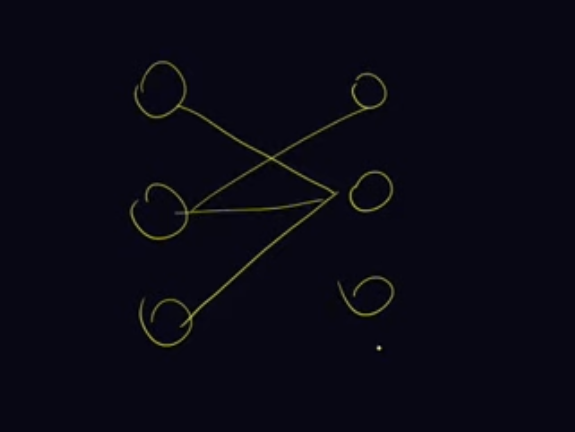

Алгоритм проверки на двудольнольность:
- Выбираем первую вершину и запускаем обход в глубину для нее
- Помечаем текущую вершину первым цветом
- Проверяем такой ли цвет у всех соседей выбранной вершины
- Если у всех соседей цвета такие же как у рассматриваемой = плохо
- Если цвета соседей и рассматриваемой разные, то хорошо
- Если у соседей нет цвета, то идем в это ребро и метим его другим цветом по отношению к прошлой вершине, из которой пришли
- Для двудольного графа не должно быть  у рассматриваемой вершины соседей с таким же цветом!!

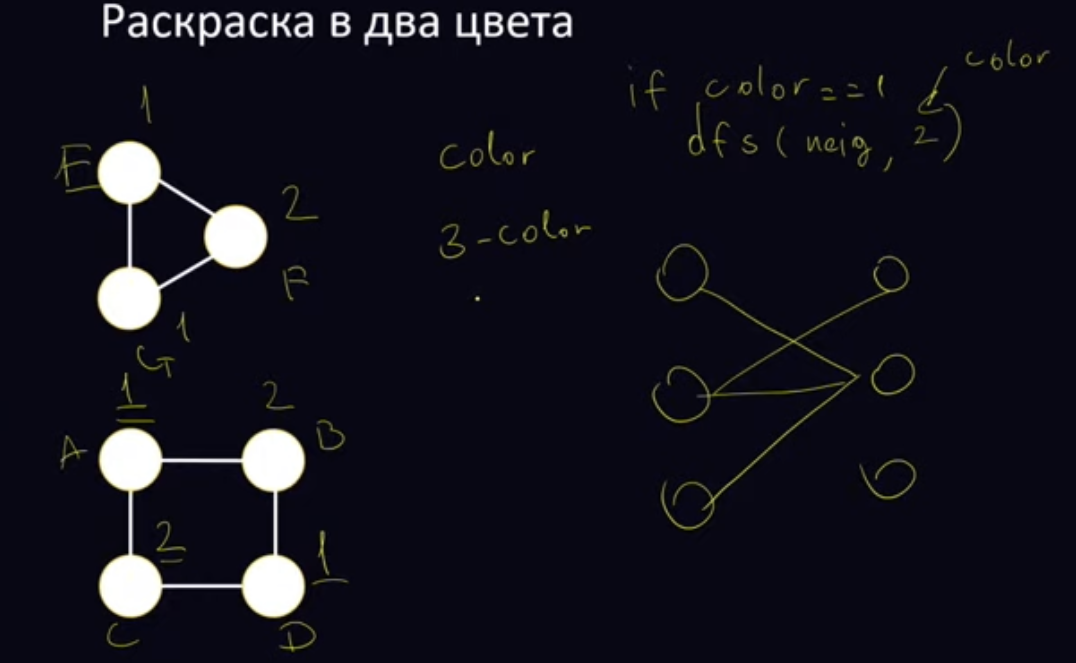

Для всех двудольных графов справедливо утверждение, что в них НЕТ циклов, что следует из смыла двудольности графа. Для цикла необходимо нечетное кол-во ребер, что обзывает иметь ребра между вершинами одной доли, что изначально невозможно.